In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv(os.path.join("dataset", "preprocessed_ds.csv"))

In [3]:
df.shape

(1200, 26)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,target
0,-0.054370,-0.037797,-0.012507,-0.057974,-0.021634,-0.013976,-0.038334,-0.000743,-0.011150,-0.009928,...,-0.036374,0.000065,-0.019362,-0.018975,-0.013414,-0.005737,-0.006352,0.000613,-8.835381e-17,4
1,0.927998,0.086490,0.005188,0.058084,0.011257,-0.024652,0.009155,0.006720,0.003109,0.001622,...,-0.012596,-0.009111,-0.015764,-0.004817,-0.001930,-0.002440,0.002207,-0.000024,-3.429862e-17,4
2,-0.054370,-0.037797,-0.012507,-0.057974,-0.021634,-0.013976,-0.038334,-0.000743,-0.011150,-0.009928,...,-0.036374,0.000065,-0.019362,-0.018975,-0.013414,-0.005737,-0.006352,0.000613,-7.393419e-17,4
3,-0.054370,-0.037797,-0.012507,-0.057974,-0.021634,-0.013976,-0.038334,-0.000743,-0.011150,-0.009928,...,-0.036374,0.000065,-0.019362,-0.018975,-0.013414,-0.005737,-0.006352,0.000613,-3.781455e-17,1
4,-0.054370,-0.037797,-0.012507,-0.057974,-0.021634,-0.013976,-0.038334,-0.000743,-0.011150,-0.009928,...,-0.036374,0.000065,-0.019362,-0.018975,-0.013414,-0.005737,-0.006352,0.000613,-3.867087e-17,3


In [5]:
df["target"]

0       4
1       4
2       4
3       1
4       3
       ..
1195    3
1196    4
1197    2
1198    2
1199    2
Name: target, Length: 1200, dtype: int64

In [6]:
X = df.drop("target", axis=1)
y = df["target"]

In [7]:
X.shape

(1200, 25)

In [8]:
y.shape

(1200,)

In [9]:
y

0       4
1       4
2       4
3       1
4       3
       ..
1195    3
1196    4
1197    2
1198    2
1199    2
Name: target, Length: 1200, dtype: int64

In [10]:
import mlflow
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from statistics import mean
import numpy as np

In [11]:
def eval_metrics(clf, X, actual):
    pred = clf.predict(X)
    return {
        "accuracy": accuracy_score(actual, pred),
        "recall": recall_score(actual, pred, average="weighted"),
        "precision": precision_score(actual, pred, average="weighted"),
        "f1": f1_score(actual, pred, average="weighted")
    }

In [12]:
def run_exp(clf, name, params={}):
    with mlflow.start_run(run_name=name):
        results = cross_validate(clf, X, y, cv=5, scoring=eval_metrics)
        clf.fit(X, y)
        signature = mlflow.models.infer_signature(X, clf.predict(X))

        mlflow.sklearn.log_model(clf, "model", signature=signature)

        if params:
            for k, v in params.items():
                mlflow.log_param(k, v)

        mlflow.log_metric("accuracy mean", mean(results["test_accuracy"]))
        mlflow.log_metric("accuracy std", np.std(results["test_accuracy"]))
        mlflow.log_metric("recall mean", mean(results["test_recall"]))
        mlflow.log_metric("recall std", np.std(results["test_recall"]))
        mlflow.log_metric("precision mean", mean(results["test_precision"]))
        mlflow.log_metric("precision std", np.std(results["test_precision"]))
        mlflow.log_metric("F1 score mean", mean(results["test_f1"]))
        mlflow.log_metric("F1 score std", np.std(results["test_f1"]))

In [13]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

names = [
    "LR",
    "SVC",
    "DTC",
    "RFC",
    "GBC"
]

for model, name in zip(models, names):
    print(f"Training {name}...")
    run_exp(model, name)

Training LR...


Training SVC...


c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Training DTC...


c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Training RFC...


c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Training GBC...


c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [14]:
import random

In [15]:
parameters = {
    "learning_rate": [0.1, 0.3, 0.01],
    "n_estimators": [100, 50, 300]
}

for _ in range(5):
    lr = random.choice(parameters["learning_rate"])
    n_est = random.choice(parameters["n_estimators"])
    clf = GradientBoostingClassifier(learning_rate=lr, 
                                     n_estimators=n_est)
    
    print(f"Training {name}...")
    run_exp(model, name, {
        "learning_rate": lr,
        "n_estimators": n_est
    })

Training GBC...


c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Training GBC...


c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Training GBC...


c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Training GBC...


c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Training GBC...


c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\User\formation\News-Scanner\venv\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [16]:
logged_model = 'runs:/2dbbfba9ef174a928e5d2158729381e3/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

In [17]:
pred = loaded_model.predict(X)

In [18]:
eval_data = X
eval_data["label"] = y

with mlflow.start_run() as run:
    # Evaluate the logged model
    result = mlflow.evaluate(
        logged_model,
        eval_data,
        targets="label",
        model_type="classifier",
        evaluators=["default"],
    )

c:\Users\User\formation\News-Scanner\venv\lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  string_columns = trimmed_df.columns[(df.applymap(type) == str).all(0)]
c:\Users\User\formation\News-Scanner\venv\lib\site-packages\mlflow\models\evaluation\base.py:363: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(_hash_array_like_element_as_bytes)
c:\Users\User\formation\News-Scanner\venv\lib\site-packages\mlflow\models\evaluation\base.py:363: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(_hash_array_like_element_as_bytes)
c:\Users\User\formation\News-Scanner\venv\lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time

<Figure size 1050x700 with 0 Axes>

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [20]:
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       0.70      0.32      0.44       291
           2       0.53      0.31      0.39       300
           3       0.83      0.31      0.45       305
           4       0.31      0.81      0.45       304

    accuracy                           0.44      1200
   macro avg       0.59      0.44      0.43      1200
weighted avg       0.59      0.44      0.43      1200



In [22]:
cm = confusion_matrix(y, pred)

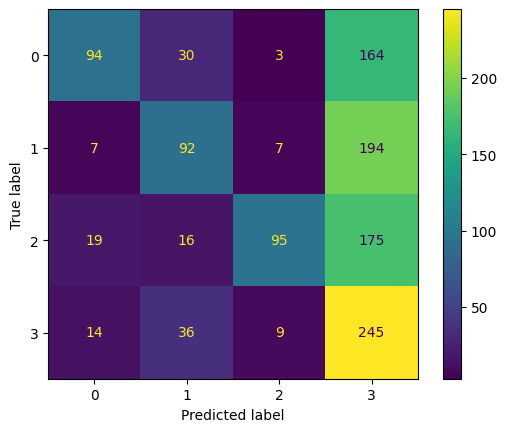

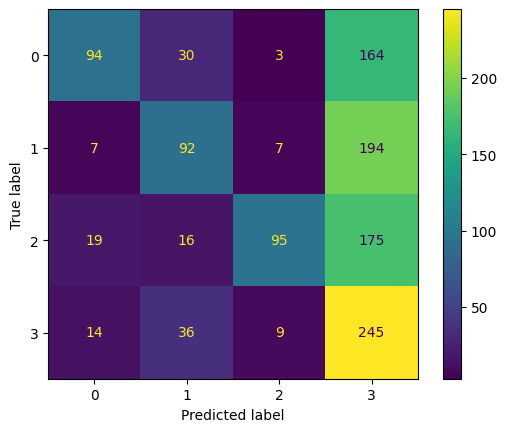

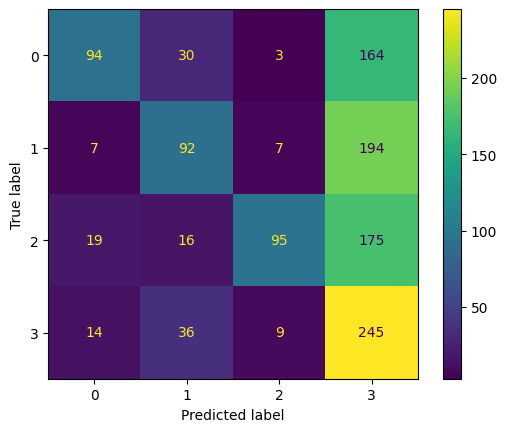

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()